## INTRODUCTION

The PAMAP2 (Physical Activity Monitoring and Assessment System) dataset was developed by a team of researchers at the University of Twente in the Netherlands.

The dataset used is PAMAP2 which is an Activity Monitoring dataset that covers 18 different physical activities which are taken by 9 different subjects (8 men and 1 woman) taken using 3 inertial measurement units and a heart rate monitor.

Inertial measurement units contain an accelerometer, gyroscope, and magnetometer. The accelerometer measures acceleration, while the gyroscope measures angular velocity. Each of these measurements is represented in a three-axis coordinate system.


- Sensor position:
- 1 IMU over the wrist on the dominant arm
- 1 IMU on the chest
- 1 IMU on the dominant side's ankle


The data files contain 54 columns: each line consists of a timestamp, an activity label,  and 52 attributes of raw sensory data(from sensors devices). 

Data used in this notebook can be found and downloaded from:
https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring




In [1]:
#IMPORTING REQUIRED LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### DATA LOADING

In [2]:
# URL of dataset ZIP File
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip"

# EXTRACTING FILE FROM ZIP AND SAVING TO DRIVE
"""import requests
import zipfile
import io

# Send a GET request to the URL and download the ZIP file
response = requests.get(url)
zip_data = response.content

# Extract the contents of the ZIP file
with zipfile.ZipFile(io.BytesIO(zip_data)) as zip_file:
    # Specify the directory where you want to save the extracted files
    extract_dir = "/content/drive/MyDrive/Ml Project Pamap2/"
    zip_file.extractall(extract_dir)

print("Extraction complete. Files saved in", extract_dir)
"""

'import requests\nimport zipfile\nimport io\n\n# Send a GET request to the URL and download the ZIP file\nresponse = requests.get(url)\nzip_data = response.content\n\n# Extract the contents of the ZIP file\nwith zipfile.ZipFile(io.BytesIO(zip_data)) as zip_file:\n    # Specify the directory where you want to save the extracted files\n    extract_dir = "/content/drive/MyDrive/Ml Project Pamap2/"\n    zip_file.extractall(extract_dir)\n\nprint("Extraction complete. Files saved in", extract_dir)\n'

In [3]:
#LIST OF COLUMNS NAME
columnsName = [
    "timestamp",
    "activityID",
    "heart_rate",
    "IMU_hand_temp",
    "IMU_hand_acc_X",
    "IMU_hand_acc_Y",
    "IMU_hand_acc_Z",
    "IMU_hand_acc_X_6g",
    "IMU_hand_acc_Y_6g",
    "IMU_hand_acc_Z_6g",
    "IMU_hand_gyro_X",
    "IMU_hand_gyro_Y",
    "IMU_hand_gyro_Z",
    "IMU_hand_mag_X",
    "IMU_hand_mag_Y",
    "IMU_hand_mag_Z",
    "IMU_hand_orient",
    "IMU_hand_orient1",
    "IMU_hand_orient2","IMU_hand_orient3",
    "IMU_chest_temp",
    "IMU_chest_acc_X",
    "IMU_chest_acc_Y",
    "IMU_chest_acc_Z",
    "IMU_chest_acc_X_6g",
    "IMU_chest_acc_Y_6g",
    "IMU_chest_acc_Z_6g",
    "IMU_chest_gyro_X",
    "IMU_chest_gyro_Y",
    "IMU_chest_gyro_Z",
    "IMU_chest_mag_X",
    "IMU_chest_mag_Y",
    "IMU_chest_mag_Z",
    "IMU_chest_orient","IMU_chest_orient1","IMU_chest_orient2","IMU_chest_orient3",
    "IMU_ankle_temp",
    "IMU_ankle_acc_X",
    "IMU_ankle_acc_Y",
    "IMU_ankle_acc_Z",
    "IMU_ankle_acc_X_6g",
    "IMU_ankle_acc_Y_6g",
    "IMU_ankle_acc_Z_6g",
    "IMU_ankle_gyro_X",
    "IMU_ankle_gyro_Y",
    "IMU_ankle_gyro_Z",
    "IMU_ankle_mag_X",
    "IMU_ankle_mag_Y",
    "IMU_ankle_mag_Z",
    "IMU_ankle_orient","IMU_ankle_orient1","IMU_ankle_orient2","IMU_ankle_orient3",
]
print(len(columnsName))

# DICTIONARY OF ACTIVITIES
activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

54


In [4]:
# INITIAL FILE PATH
file_path = "/content/drive/MyDrive/Ml Project Pamap2/PAMAP2_Dataset/Protocol/"

# ALL SUBJECT DATA FILE NAME (IN LIST)
file_path_loc = ["subject101.dat", "subject102.dat", "subject103.dat", "subject104.dat", "subject105.dat", "subject106.dat", "subject107.dat", "subject108.dat", "subject109.dat"]

# EMPTY LIST FOR STORING DATAFRAME
dataframes_list = []

for file in file_path_loc:
  # READING DATA FILE AND SET COLUMN NAME AS ABOVE LIST
    df = pd.read_csv(file_path + file, delimiter=' ', names=columnsName)
    dataframes_list.append(df)

# MAKING A SINGLE DATAFRAME FOR ALL ABOVE SUBJECT DATA
df = pd.concat(dataframes_list)

# Reset the index of the concatenated DataFrame
concatenated_df = df.reset_index(drop=True)

print(df)

      timestamp  activityID  heart_rate  IMU_hand_temp  IMU_hand_acc_X  \
0          8.38           0       104.0        30.0000         2.37223   
1          8.39           0         NaN        30.0000         2.18837   
2          8.40           0         NaN        30.0000         2.37357   
3          8.41           0         NaN        30.0000         2.07473   
4          8.42           0         NaN        30.0000         2.22936   
...         ...         ...         ...            ...             ...   
8472     100.19           0         NaN        25.1875        -4.71493   
8473     100.20           0         NaN        25.1875        -4.95932   
8474     100.21           0         NaN        25.1875        -4.93997   
8475     100.22           0         NaN        25.1875        -4.64941   
8476     100.23           0       161.0        25.1875        -4.09726   

      IMU_hand_acc_Y  IMU_hand_acc_Z  IMU_hand_acc_X_6g  IMU_hand_acc_Y_6g  \
0            8.60074         3.51

In [5]:
df.shape

(2872533, 54)

### DATA BASIC INSIGHTS

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,2872533.0,1834.353868,1105.688998,5.640000,893.160000,1790.830000,2710.570000,4475.630000
activityID,2872533.0,5.466243,6.331333,0.000000,0.000000,3.000000,7.000000,24.000000
heart_rate,262268.0,109.872508,25.870036,57.000000,90.000000,108.000000,125.000000,202.000000
IMU_hand_temp,2859392.0,32.652579,1.844274,24.750000,31.437500,33.125000,34.000000,35.500000
IMU_hand_acc_X,2859392.0,-4.960786,5.985029,-145.367000,-9.028420,-5.788145,-0.782942,62.859600
IMU_hand_acc_Y,2859392.0,3.587758,6.277838,-104.301000,1.290268,3.570830,6.602720,155.699000
IMU_hand_acc_Z,2859392.0,3.168417,3.843923,-101.452000,0.968582,2.958415,6.002930,157.760000
IMU_hand_acc_X_6g,2859392.0,-4.889420,5.992726,-61.489500,-8.933270,-5.737615,-0.724992,52.821400
IMU_hand_acc_Y_6g,2859392.0,3.584267,6.055750,-61.868000,1.284680,3.613430,6.601960,62.259800
IMU_hand_acc_Z_6g,2859392.0,3.349479,3.840650,-61.934700,1.164040,3.132855,6.257612,61.944600


In [7]:
df.info()  # No categorical data present

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2872533 entries, 0 to 8476
Data columns (total 54 columns):
 #   Column              Dtype  
---  ------              -----  
 0   timestamp           float64
 1   activityID          int64  
 2   heart_rate          float64
 3   IMU_hand_temp       float64
 4   IMU_hand_acc_X      float64
 5   IMU_hand_acc_Y      float64
 6   IMU_hand_acc_Z      float64
 7   IMU_hand_acc_X_6g   float64
 8   IMU_hand_acc_Y_6g   float64
 9   IMU_hand_acc_Z_6g   float64
 10  IMU_hand_gyro_X     float64
 11  IMU_hand_gyro_Y     float64
 12  IMU_hand_gyro_Z     float64
 13  IMU_hand_mag_X      float64
 14  IMU_hand_mag_Y      float64
 15  IMU_hand_mag_Z      float64
 16  IMU_hand_orient     float64
 17  IMU_hand_orient1    float64
 18  IMU_hand_orient2    float64
 19  IMU_hand_orient3    float64
 20  IMU_chest_temp      float64
 21  IMU_chest_acc_X     float64
 22  IMU_chest_acc_Y     float64
 23  IMU_chest_acc_Z     float64
 24  IMU_chest_acc_X_6g  float64

## DATA PREPROCESSING

#### REMOVING UNREQUIRED ATTRIBUTES OR ROWS


0     929661
4     238761
17    238690
1     192523
3     189931
7     188107
2     185188
16    175353
6     164600
12    117216
13    104944
5      98199
24     49360
Name: activityID, dtype: int64


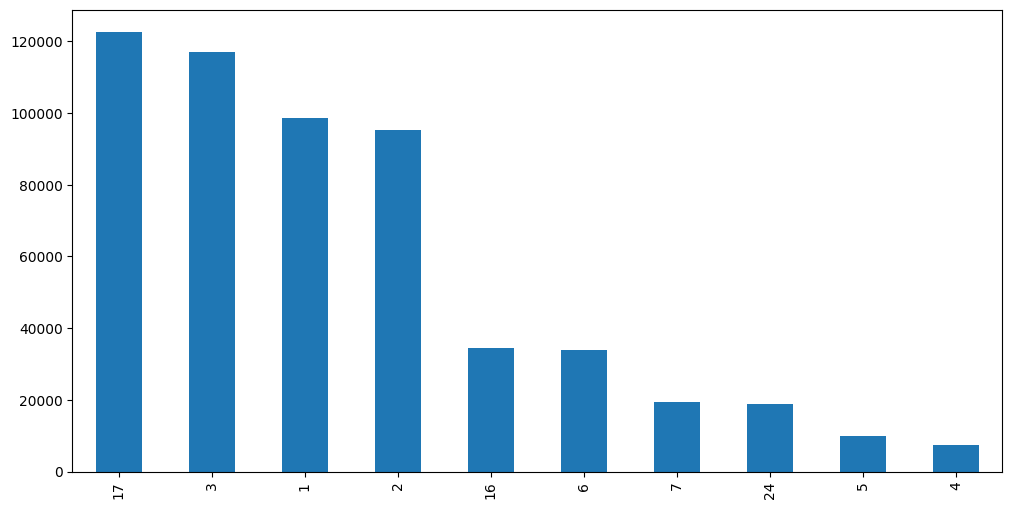

In [8]:
# DROP ROWS WHERE activityID == 0
print(df["activityID"].value_counts())

df.drop(df[df["activityID"] == 0].index ,inplace = True)

df['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show() #  UNBALANCED

In [9]:
# dropping orient attribute
orient_attr  =["IMU_hand_orient","IMU_hand_orient1","IMU_hand_orient2","IMU_hand_orient3","IMU_chest_orient","IMU_chest_orient1","IMU_chest_orient2","IMU_chest_orient3","IMU_ankle_orient","IMU_ankle_orient1","IMU_ankle_orient2","IMU_ankle_orient3"]

df.drop(orient_attr,axis = 1,inplace = True)
df.shape

(557417, 42)

#### HANDLING MISSING VALUES

In [10]:
df.isna().sum()

timestamp                  0
activityID                 0
heart_rate            506493
IMU_hand_temp            881
IMU_hand_acc_X           881
IMU_hand_acc_Y           881
IMU_hand_acc_Z           881
IMU_hand_acc_X_6g        881
IMU_hand_acc_Y_6g        881
IMU_hand_acc_Z_6g        881
IMU_hand_gyro_X          881
IMU_hand_gyro_Y          881
IMU_hand_gyro_Z          881
IMU_hand_mag_X           881
IMU_hand_mag_Y           881
IMU_hand_mag_Z           881
IMU_chest_temp           453
IMU_chest_acc_X          453
IMU_chest_acc_Y          453
IMU_chest_acc_Z          453
IMU_chest_acc_X_6g       453
IMU_chest_acc_Y_6g       453
IMU_chest_acc_Z_6g       453
IMU_chest_gyro_X         453
IMU_chest_gyro_Y         453
IMU_chest_gyro_Z         453
IMU_chest_mag_X          453
IMU_chest_mag_Y          453
IMU_chest_mag_Z          453
IMU_ankle_temp          1615
IMU_ankle_acc_X         1615
IMU_ankle_acc_Y         1615
IMU_ankle_acc_Z         1615
IMU_ankle_acc_X_6g      1615
IMU_ankle_acc_

92.07283402717775


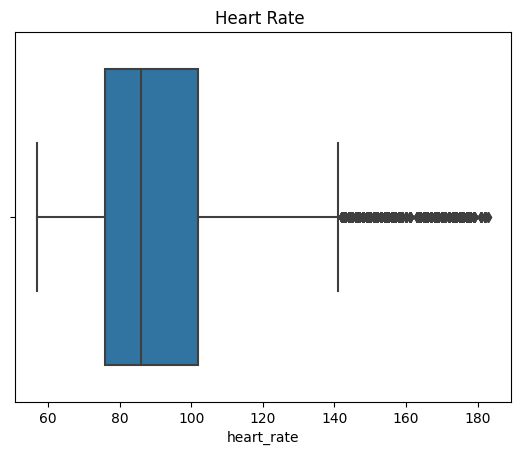

In [11]:
# ig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(x=df["heart_rate"])
print(np.mean(df['heart_rate']))

<Axes: xlabel='activityID'>

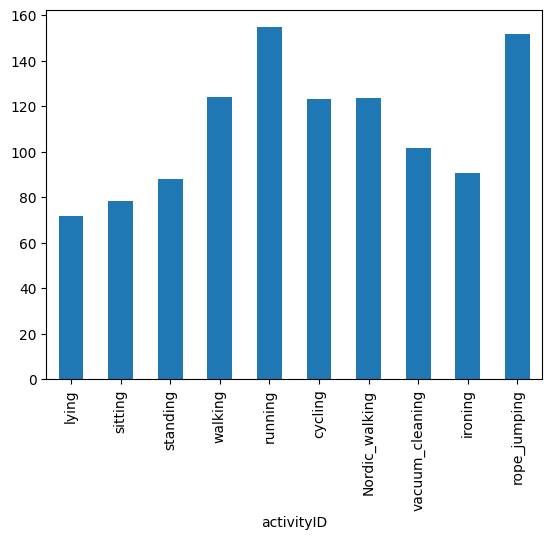

In [12]:
df_hr_act = df['heart_rate'].groupby(df['activityID']).mean()
df_hr_act.index = df_hr_act.index.map(activityIDdict)
df_hr_act.plot(kind='bar')

In [13]:
#FUNCTION TO HANDLE HEART RATE MISSING VALUE
def fill_missing_heart_rate(df, activity_ids):
    for activity_id in activity_ids:
        mean_hr = df[df['activityID'] == activity_id]['heart_rate'].mean()
        df.loc[(df['activityID'] == activity_id) & (df['heart_rate'].isnull()), 'heart_rate'] = mean_hr
    return df


In [14]:
activity_ids = np.arange(25)
df = fill_missing_heart_rate(df, activity_ids)

#CHECKING 
print(df['heart_rate'].isnull().sum())

0


In [15]:
df['heart_rate'].isnull().sum()

0

In [16]:
# Imputing with mean value
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy='mean')


columns_with_missing_values  = ["IMU_hand_temp","IMU_chest_temp","IMU_ankle_temp"]

for col in columns_with_missing_values: 
  df[[col]] = si.fit_transform(df[[col]])


In [17]:
df.isna().sum()

timestamp                0
activityID               0
heart_rate               0
IMU_hand_temp            0
IMU_hand_acc_X         881
IMU_hand_acc_Y         881
IMU_hand_acc_Z         881
IMU_hand_acc_X_6g      881
IMU_hand_acc_Y_6g      881
IMU_hand_acc_Z_6g      881
IMU_hand_gyro_X        881
IMU_hand_gyro_Y        881
IMU_hand_gyro_Z        881
IMU_hand_mag_X         881
IMU_hand_mag_Y         881
IMU_hand_mag_Z         881
IMU_chest_temp           0
IMU_chest_acc_X        453
IMU_chest_acc_Y        453
IMU_chest_acc_Z        453
IMU_chest_acc_X_6g     453
IMU_chest_acc_Y_6g     453
IMU_chest_acc_Z_6g     453
IMU_chest_gyro_X       453
IMU_chest_gyro_Y       453
IMU_chest_gyro_Z       453
IMU_chest_mag_X        453
IMU_chest_mag_Y        453
IMU_chest_mag_Z        453
IMU_ankle_temp           0
IMU_ankle_acc_X       1615
IMU_ankle_acc_Y       1615
IMU_ankle_acc_Z       1615
IMU_ankle_acc_X_6g    1615
IMU_ankle_acc_Y_6g    1615
IMU_ankle_acc_Z_6g    1615
IMU_ankle_gyro_X      1615
I

In [18]:
# Dropping the row having null value

df.dropna(inplace = True)
df.isna().sum()

timestamp             0
activityID            0
heart_rate            0
IMU_hand_temp         0
IMU_hand_acc_X        0
IMU_hand_acc_Y        0
IMU_hand_acc_Z        0
IMU_hand_acc_X_6g     0
IMU_hand_acc_Y_6g     0
IMU_hand_acc_Z_6g     0
IMU_hand_gyro_X       0
IMU_hand_gyro_Y       0
IMU_hand_gyro_Z       0
IMU_hand_mag_X        0
IMU_hand_mag_Y        0
IMU_hand_mag_Z        0
IMU_chest_temp        0
IMU_chest_acc_X       0
IMU_chest_acc_Y       0
IMU_chest_acc_Z       0
IMU_chest_acc_X_6g    0
IMU_chest_acc_Y_6g    0
IMU_chest_acc_Z_6g    0
IMU_chest_gyro_X      0
IMU_chest_gyro_Y      0
IMU_chest_gyro_Z      0
IMU_chest_mag_X       0
IMU_chest_mag_Y       0
IMU_chest_mag_Z       0
IMU_ankle_temp        0
IMU_ankle_acc_X       0
IMU_ankle_acc_Y       0
IMU_ankle_acc_Z       0
IMU_ankle_acc_X_6g    0
IMU_ankle_acc_Y_6g    0
IMU_ankle_acc_Z_6g    0
IMU_ankle_gyro_X      0
IMU_ankle_gyro_Y      0
IMU_ankle_gyro_Z      0
IMU_ankle_mag_X       0
IMU_ankle_mag_Y       0
IMU_ankle_mag_Z 

In [19]:
# CHECKING EFFECT OF DROPPING MISSING VALUES ROWS
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,554506.0,1102.132635,1006.360313,166.11000,532.200000,726.560000,1049.630000,4245.68000
activityID,554506.0,7.425213,7.119369,1.00000,2.000000,3.000000,17.000000,24.00000
heart_rate,554506.0,91.972328,20.461946,57.00000,78.276596,87.979311,90.583757,183.00000
IMU_hand_temp,554506.0,33.080244,1.598380,27.93750,32.500000,33.437500,34.187500,35.50000
IMU_hand_acc_X,554506.0,-2.981205,5.715681,-106.52700,-7.918190,-3.006650,0.482542,62.85960
IMU_hand_acc_Y,554506.0,3.390640,5.478183,-68.62530,1.071665,3.638395,6.581520,154.57600
IMU_hand_acc_Z,554506.0,4.286889,4.000480,-55.96370,1.934590,4.842170,7.068785,116.97700
IMU_hand_acc_X_6g,554506.0,-2.882950,5.725785,-61.12920,-7.788507,-2.931880,0.498351,46.21100
IMU_hand_acc_Y_6g,554506.0,3.392232,5.384863,-61.81040,1.081913,3.677450,6.576507,62.23270
IMU_hand_acc_Z_6g,554506.0,4.484285,4.021048,-50.92580,2.132828,5.070620,7.300470,61.72800



## FEATURE MODELLING


In [20]:
# GETTING  TARGETS ATTRIBUTE
target = df["activityID"]

df.drop(["activityID"],axis = 1,inplace = True)
target

16047      1
16048      1
16049      1
16050      1
16051      1
          ..
383328    24
383329    24
383330    24
383331    24
383332    24
Name: activityID, Length: 554506, dtype: int64

In [21]:
# dropping timestamp 
df.drop(['timestamp'],axis = 1, inplace = True)
df

,heart_rate,IMU_hand_temp,IMU_hand_acc_X,IMU_hand_acc_Y,IMU_hand_acc_Z,IMU_hand_acc_X_6g,IMU_hand_acc_Y_6g,IMU_hand_acc_Z_6g,IMU_hand_gyro_X,IMU_hand_gyro_Y,...,IMU_ankle_acc_Z,IMU_ankle_acc_X_6g,IMU_ankle_acc_Y_6g,IMU_ankle_acc_Z_6g,IMU_ankle_gyro_X,IMU_ankle_gyro_Y,IMU_ankle_gyro_Z,IMU_ankle_mag_X,IMU_ankle_mag_Y,IMU_ankle_mag_Z
16047,71.734316,31.3125,3.878450,-3.961430,-8.20172,3.818810,-3.92995,-8.21634,0.041972,-0.016219,...,-9.88336,-1.26881,2.36232,-9.466980,-0.059827,0.009349,-0.009094,-20.9165,21.1089,39.9528
16048,71.734316,31.3125,3.764550,-4.036440,-8.20317,3.879090,-3.96056,-8.18614,-0.007792,0.019109,...,-9.84514,-1.29860,2.36238,-9.406280,-0.005102,-0.013422,0.018408,-20.6861,20.8753,40.3198
16049,71.734316,31.3125,3.768830,-3.997490,-8.08778,3.848310,-3.99059,-8.23134,-0.010467,-0.029370,...,-9.80623,-1.32858,2.34727,-9.390940,-0.004489,-0.020045,0.009682,-21.2615,21.4585,39.4642
16050,71.734316,31.3125,3.881920,-3.846940,-8.12508,3.848950,-3.89999,-8.24664,-0.003035,0.015171,...,-9.80677,-1.28383,2.34719,-9.466850,0.019597,-0.009899,-0.022457,-21.0157,20.3370,40.1929
16051,71.734316,31.3125,3.802070,-3.885310,-8.24161,3.864530,-3.86987,-8.21652,0.025282,-0.003291,...,-9.84546,-1.34370,2.45311,-9.421470,0.005016,-0.069109,0.012398,-20.9061,20.2293,39.6958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383328,151.725319,30.8125,-0.886184,-1.203570,7.42045,-3.020290,-3.59176,9.97124,4.800730,3.125320,...,-3.93860,7.18985,-15.74480,-0.720635,0.806285,-0.826977,0.340613,-25.2329,33.3845,31.6329
383329,151.725319,30.8125,-1.789380,-2.550470,4.52492,-0.999129,-1.20885,5.93204,4.025600,4.067580,...,-2.82636,12.93570,-13.65880,-2.725440,0.872640,-0.835344,-0.465147,-25.3676,34.1662,32.4825
383330,151.725319,30.8125,-9.966240,-4.205060,3.25340,-3.574840,-2.46088,3.76291,3.126640,5.408580,...,-6.19176,16.44790,-12.26750,-3.550740,0.868042,-0.643233,-1.229040,-25.6243,33.7902,31.6310
383331,151.725319,30.8125,-19.512500,-2.887580,2.18226,-11.369000,-3.37223,2.62522,3.036550,6.826000,...,-7.33986,14.54350,-12.10490,-6.341160,0.806717,-0.356927,-2.033950,-26.3852,33.5707,31.6286


#### SPLITING DATA INTO TRAIN TEST 

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df,target, test_size=0.25, random_state=9)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(415879, 40)
(138627, 40)
(415879,)
(138627,)


In [23]:
# SCALING TO SETTING ALL ATTRIBUTES UNITS SIMILAR
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling
scaler = RobustScaler()


# x_train.iloc[:,1:] = scaler.fit_transform(x_train.iloc[:,1:])
# x_test.iloc[:,1:] = scaler.transform(x_test.iloc[:,1:])

x_train.iloc[:,0:] = scaler.fit_transform(x_train.iloc[:,0:])
x_test.iloc[:,0:] = scaler.transform(x_test.iloc[:,0:])

print(x_train.head(10))

        heart_rate  IMU_hand_temp  IMU_hand_acc_X  IMU_hand_acc_Y  \
94172     0.000000      -0.518519       -0.694615       -0.138199   
65936     0.000000       0.074074       -0.542008        0.055855   
101105    0.211620       0.296296       -0.703907        0.624623   
25300    -1.319963      -0.370370        1.001586       -0.631888   
70564     0.000000       0.111111       -0.603148       -0.075052   
19623    -1.319963      -0.407407        0.953448       -0.548327   
101684    0.211620       0.074074       -0.365656       -0.246456   
67156     0.000000      -0.222222       -0.724614       -0.113317   
104680    0.211620       0.333333       -0.306790       -0.518339   
65645    -0.788380      -0.888889        0.515955        1.052272   

        IMU_hand_acc_Z  IMU_hand_acc_X_6g  IMU_hand_acc_Y_6g  \
94172        -0.410258          -0.709907          -0.129423   
65936        -0.040005          -0.528370           0.069552   
101105       -0.593109          -0.821024       

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


# Define a list of classifiers
classifiers = [
    DecisionTreeClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(),  
    RandomForestClassifier(),
    AdaBoostClassifier()
    
]


In [25]:

# Lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Train and evaluate each classifier
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    print(f"Classifier: {type(classifier)}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("--------------------------------------------")


Classifier: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Accuracy: 0.9993
Precision: 0.9993
Recall: 0.9993
F1-Score: 0.9993
--------------------------------------------
Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
Accuracy: 0.9277
Precision: 0.9326
Recall: 0.9277
F1-Score: 0.9286
--------------------------------------------
Classifier: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
Accuracy: 0.9886
Precision: 0.9887
Recall: 0.9886
F1-Score: 0.9886
--------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Accuracy: 0.9304
Precision: 0.9306
Recall: 0.9304
F1-Score: 0.9305
--------------------------------------------
Classifier: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
--------------------------------------------
Classifier: <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
Accuracy: 0.4690
Precision: 0.4874
Recall: 0.4690
F1-Score: 0.4085
--------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


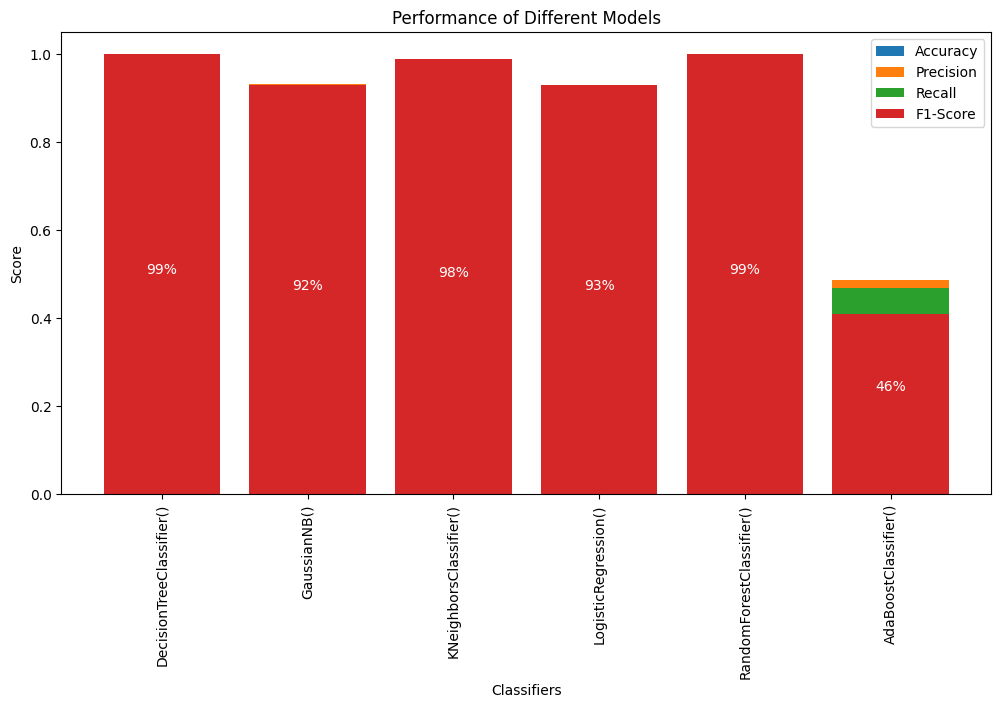

In [31]:
# Plotting performance of different models
labels = [classifier for classifier in classifiers]
x = range(len(classifiers))

plt.figure(figsize=(12, 6))
plt.bar(x, accuracy_scores, label='Accuracy')
plt.bar(x, precision_scores, label='Precision')
plt.bar(x, recall_scores, label='Recall')
plt.bar(x, f1_scores, label='F1-Score')

accuracy_scores_percentage = [score * 100 for score in accuracy_scores]
def addlabels(x, y):
    for i in range(len(x)):
        plt.text(x[i], accuracy_scores[i] / 2, f'{int(y[i])}%', ha='center', color='white')

# # Call the function to add value labels
addlabels(x, accuracy_scores_percentage)
# print(accuracy_scores_percentage)

plt.xlabel('Classifiers')
plt.ylabel('Score')
plt.title('Performance of Different Models')
plt.xticks(x, labels, rotation=90)
plt.legend()
# plt.tight_layout()
plt.show()
